# Week 3: Group Assignment 2 - Max Garcia
## Description: Exploring race data in LA County.
## Author: Max Garcia
## In a group with: Annie Chan, Miles Kim Parr, Aydin Pasebani, and Rodrigo Gutierrez

## Description: This week I will continue my exploration of race data in the 4th Supervisorial District of LA County. However, I will look at this data in conjunction with parks data to see if there are any trends I can easily spot through mapping. The goal will be to produce this into an interactive folium map and that these methods can be applied to another district for comparison in the final project.


### First, I'm going to import the pandas and geopandas libraries.

In [343]:
import pandas as pd 
import geopandas as gpd

### Next, I'm going to load in the dataset I downloaded from the US Census website. I downloaded 2022 racial identity data by census tracts in LA County (from the ACS 5-year estimates) as a .zip file. Then I used Chris' instructions to split the GEO_ID column to get FIPS codes in Microsoft Excel. I also renamed columns in Microsoft Excel before I realized it could be done in python.

In [344]:
race = pd.read_csv(
    'data/Race_Data_2022.csv',
    dtype=
    {
        'GEO_ID':str,
    }
)

### Following the lecture, I'm imported the data with GEO_ID as a string to ensure that the leading zeros are included.
### From here, I'm going to take a look at the data and see exactly what I have to work with. 

# Preliminary Inspection

In [345]:
race.shape

(2498, 11)

In [346]:
race.head()

GEO_ID  Total  White  Black  NativeAmerican  Asian  HawaiianAPI  \
0  06037101110   4014   2426    161               8    390            0   
1  06037101122   4164   2909     76              22    582            0   
2  06037101220   3481   1904      0              87    433            0   
3  06037101221   3756   2181    101              35    314            0   
4  06037101222   2808   1525     15              74    138           37   

   Other  Twoplus  TwoplusOther  TwominusOther_Threeplus  
0    397      632           410                      222  
1    240      335           123                      212  
2    469      588           502                       86  
3    711      414           354                       60  
4     45      974           887                       87

### Great, there is no leading zero error!

### Now I want to confirm what columns of data I am working with. I forgot we can do this in python, but I think it was helpful to do it there since I had be receiving Dtype errors before. 

In [347]:
race.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   GEO_ID                   2498 non-null   object
 1   Total                    2498 non-null   int64 
 2   White                    2498 non-null   int64 
 3   Black                    2498 non-null   int64 
 4   NativeAmerican           2498 non-null   int64 
 5   Asian                    2498 non-null   int64 
 6   HawaiianAPI              2498 non-null   int64 
 7   Other                    2498 non-null   int64 
 8   Twoplus                  2498 non-null   int64 
 9   TwoplusOther             2498 non-null   int64 
 10  TwominusOther_Threeplus  2498 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 214.8+ KB


### Lastly, I'll confirm that there are no columns that are entirely empty.

In [348]:
race.columns[race.isna().all()].tolist()

[]

### In conclusion, using the shape, head, and info to look at the data, there are 2498 rows and 22 columns in the dataset. These represent the census tracts in LA County and the racial indicators I will be inspecting.  

# Charts
### I will start by creating a histogram that plots totals of people in the census tracts. 

<Axes: ylabel='Frequency'>

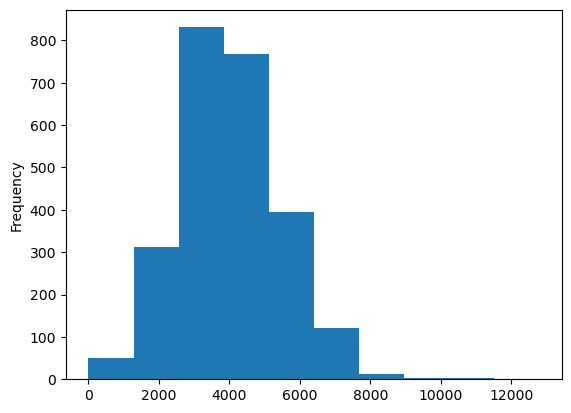

In [349]:
race['Total'].plot.hist()

### Most census tracts seem to have between 2,000 and 6,000 people.

<Axes: >

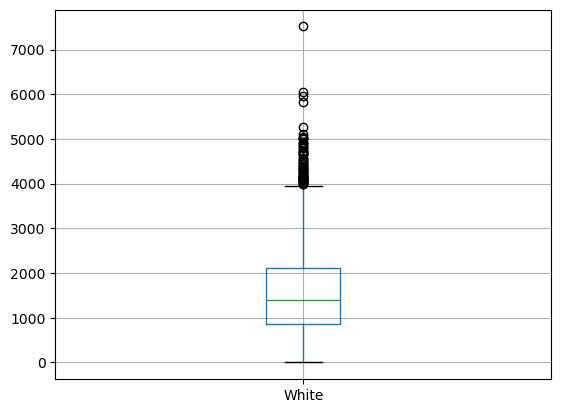

In [350]:
race.boxplot(column=['White'])

<Axes: xlabel='White', ylabel='Black'>

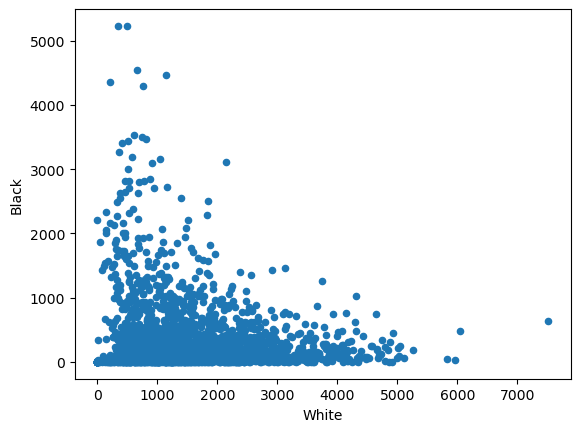

In [351]:
race.plot.scatter(x='White', y='Black')

### This scatter plot is really interesting. The positive skew demonstrates a divide between Black and White people in the county, showing that where the total number of Black people is high, the number of white people is low and vice versa.

### Let's see if it applies to other racial groups. See below for an example. 

<Axes: xlabel='White', ylabel='Asian'>

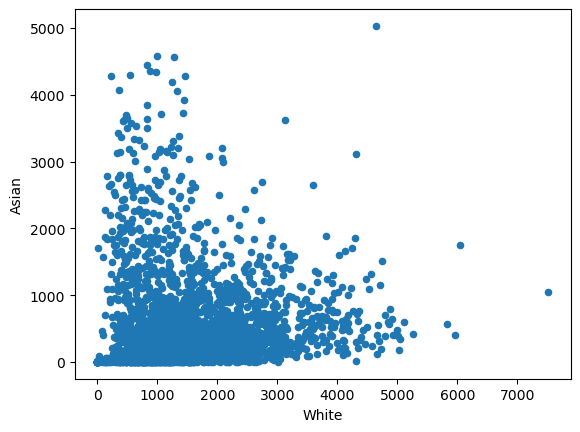

In [352]:
race.plot.scatter(x='White', y='Asian')

### There is still a positive skew, but it is less intense which signals slightly more integration.

# Sorting and Filtering Data
### Given that LA County is clearly still very segregated, I want to look at which census tracts are home to the most of each racial group in my list (for clarification, this will not include two or more races). Determining where people identifying with each category may be useful for our research question which looks at disparities in access to parks and other public space.

In [353]:
race.sort_values(by='White', ascending = False)[['GEO_ID', 'White']].head(10)

GEO_ID  White
2278  06037702900   7515
1028  06037275604   6045
1123  06037301502   5953
1115  06037301100   5835
2286  06037800202   5256
2175  06037621104   5111
2003  06037574300   5042
1469  06037461300   5021
1211  06037401902   5015
2254  06037701304   4998

In [354]:
race.sort_values(by='Black', ascending = False)[['GEO_ID', 'Black']].head(10)

GEO_ID  Black
1818  06037543322   5232
1814  06037543304   5231
2281  06037703100   4549
2279  06037703002   4473
863   06037238200   4359
2282  06037703200   4297
1783  06037541200   3528
2087  06037601303   3495
862   06037238100   3473
861   06037238000   3434

In [271]:
race.sort_values(by='NativeAmerican', ascending = False)[['GEO_ID', 'NativeAmerican']].head(10)

GEO_ID  NativeAmerican
1429  06037432802             784
2099  06037602103             558
2140  06037603706             500
1325  06037407202             499
1282  06037404701             485
1664  06037531301             477
1261  06037403601             450
908   06037243001             424
1610  06037502604             413
823   06037232702             396

In [272]:
race.sort_values(by='Asian', ascending = False)[['GEO_ID', 'Asian']].head(10)

GEO_ID  Asian
938   06037265301   5031
1248  06037403324   4581
1372  06037408707   4560
1258  06037403408   4441
1912  06037554512   4357
1567  06037482600   4342
1370  06037408703   4300
1545  06037481712   4281
1411  06037431701   4280
1417  06037432102   4195

In [273]:
race.sort_values(by='HawaiianAPI', ascending = False)[['GEO_ID', 'HawaiianAPI']].head(10)

GEO_ID  HawaiianAPI
1816  06037543306          635
1928  06037555002          494
1879  06037552900          412
1926  06037554900          390
2063  06037600202          329
1640  06037504200          313
2428  06037920109          309
1943  06037570303          306
2046  06037577300          301
1818  06037543322          295

### While I can't group these into smaller ranges because they are qualitative identifiers, it is interesting to note that, based on the FIPS codes, people seem to be clustered by race. In the next step I am going to see if this is true. 

# Merging the Race Dataset with Census Tract Data

In [276]:
tracts = gpd.read_file('data/2020_Census_Tracts.geojson')

In [277]:
tracts.columns[tracts.isna().all()].tolist()

[]

In [278]:
tracts.head()

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
0      4992  101110  1011.10  1.229562e+07   15083.854287   
1      4993  101122  1011.22  2.845774e+07   31671.455844   
2      4994  101220  1012.20  7.522093e+06   12698.783810   
3      4995  101221  1012.21  3.812000e+06    9161.710543   
4      4996  101222  1012.22  3.191371e+06    9980.600461   

                                            geometry  
0  POLYGON ((-118.29793 34.26323, -118.30082 34.2...  
1  POLYGON ((-118.27743 34.25991, -118.27743 34.2...  
2  POLYGON ((-118.27818 34.25577, -118.27887 34.2...  
3  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  
4  POLYGON ((-118.28594 34.25590, -118.28697 34.2...

### Now I'm going to plot all of the data to see what it looks like from the file.

<Axes: >

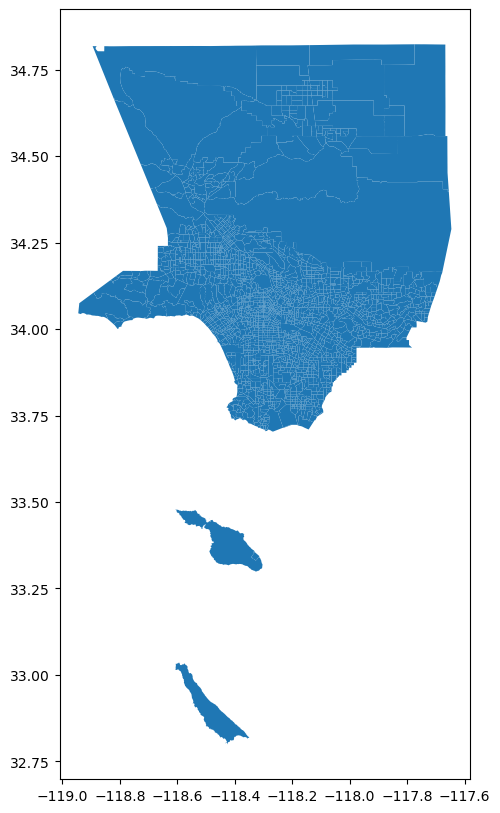

In [355]:
tracts.plot(figsize=(12,10))

### Let's see what the categories are.

In [356]:
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2496 non-null   int64   
 1   CT20           2496 non-null   object  
 2   LABEL          2496 non-null   object  
 3   ShapeSTArea    2496 non-null   float64 
 4   ShapeSTLength  2496 non-null   float64 
 5   geometry       2496 non-null   geometry
 6   GEO_ID         2496 non-null   object  
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 136.6+ KB


### There isn't a FIPS column, which will be necessary for my merge. I'm going to make one using the GEOID variable which corresponds to census tracts.

In [357]:
tracts['GEO_ID'] ='06' + '037' + tracts['CT20']
tracts.shape

(2496, 7)

In [282]:
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2496 non-null   int64   
 1   CT20           2496 non-null   object  
 2   LABEL          2496 non-null   object  
 3   ShapeSTArea    2496 non-null   float64 
 4   ShapeSTLength  2496 non-null   float64 
 5   geometry       2496 non-null   geometry
 6   GEO_ID         2496 non-null   object  
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 136.6+ KB


### This tells me that I've got good spatial data to work with. I'm ready to merge the datasets.

### I'll start by renaming the GEO_ID column in the race dataset to FIPS so I can make the 1:1 join.

In [285]:
race.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   GEO_ID                   2498 non-null   object
 1   Total                    2498 non-null   int64 
 2   White                    2498 non-null   int64 
 3   Black                    2498 non-null   int64 
 4   NativeAmerican           2498 non-null   int64 
 5   Asian                    2498 non-null   int64 
 6   HawaiianAPI              2498 non-null   int64 
 7   Other                    2498 non-null   int64 
 8   Twoplus                  2498 non-null   int64 
 9   TwoplusOther             2498 non-null   int64 
 10  TwominusOther_Threeplus  2498 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 214.8+ KB


### Time to make the merge using FIPS. This will allow me to overlay the racial data on their corresponding census tract.

In [359]:
tracts_race = tracts.merge(race,on ="GEO_ID")

In [360]:
tracts_race.columns[tracts_race.isna().all()].tolist()

[]

In [361]:
tracts_race.head(10)

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
0      4992  101110  1011.10  1.229562e+07   15083.854287   
1      4993  101122  1011.22  2.845774e+07   31671.455844   
2      4994  101220  1012.20  7.522093e+06   12698.783810   
3      4995  101221  1012.21  3.812000e+06    9161.710543   
4      4996  101222  1012.22  3.191371e+06    9980.600461   
5      4997  101300  1013.00  2.777377e+07   29384.860602   
6      4998  101400  1014.00  6.791532e+07   42668.928986   
7      4999  102103  1021.03  1.277023e+07   16349.935002   
8      5000  102104  1021.04  1.785120e+07   27555.466359   
9      5001  102105  1021.05  5.303654e+06    9962.251126   

                                            geometry       GEO_ID  Total  \
0  POLYGON ((-118.29793 34.26323, -118.30082 34.2...  06037101110   4014   
1  POLYGON ((-118.27743 34.25991, -118.27743 34.2...  06037101122   4164   
2  POLYGON ((-118.27818 34.25577, -118.27887 34.2...  06037101220   3481   
3  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  06037101221   3756   
4  POLYGON ((-118.28594 34.25590, -118.28697 34.2...  06037101222   2808   
5  POLYGON ((-118.26528 34.25238, -118.26539 34.2...  06037101300   4071   
6  POLYGON ((-118.29946 34.25598, -118.30027 34.2...  06037101400   3490   
7  POLYGON ((-118.34336 34.22588, -118.34398 34.2...  06037102103   1834   
8  POLYGON ((-118.33807 34.22228, -118.33822 34.2...  06037102104   4033   
9  POLYGON ((-118.34302 34.20656, -118.34374 34.2...  06037102105   1610   

   White  Black  NativeAmerican  Asian  HawaiianAPI  Other  Twoplus  \
0   2426    161               8    390            0    397      632   
1   2909     76              22    582            0    240      335   
2   1904      0              87    433            0    469      588   
3   2181    101              35    314            0    711      414   
4   1525     15              74    138           37     45      974   
5   3218     66               0    210            0    174      403   
6   2169     59               0    391            0    304      567   
7   1512     23               0    242            0     12       45   
8   2989     82              10    473            0     65      414   
9    508      9              19    107            6    421      540   

   TwoplusOther  TwominusOther_Threeplus  
0           410                      222  
1           123                      212  
2           502                       86  
3           354                       60  
4           887                       87  
5           188                      215  
6           238                      329  
7            11                       34  
8            99                      315  
9           461                       79

# Maps

### Now I can see where white people are concentrated in LA County, for example.

<Axes: >

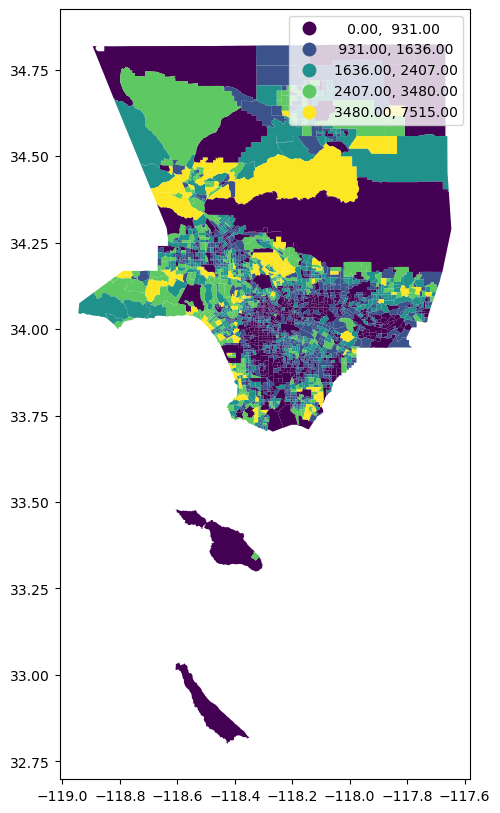

In [362]:
tracts_race.plot(figsize=(12,10),
                column='White',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

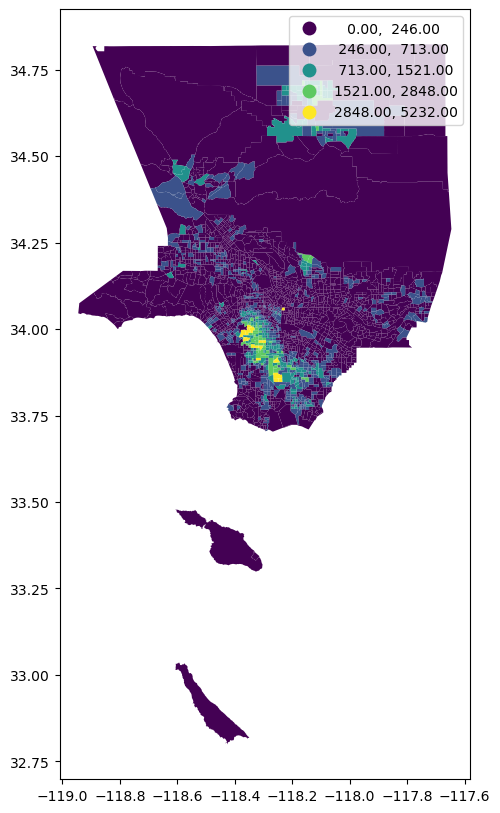

In [291]:
### And you can do the same thing with other races. For example, Black people are much less spread out in the county.
tracts_race.plot(figsize=(12,10),
                 column='Black',
                 legend=True, 
                 scheme='NaturalBreaks')

### Looking at this, I realized that I don't know the Supervisorial Districts from this map. I downloaded a new CSV from LA County Census Tracts Viewer to try to look at just District 4 which is the one I picked in our group. 

In [293]:
district4 = pd.read_csv(
    'data/DIstrict4.csv',
    dtype=
    {
        'CT20':str
    }
)
district4.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID_12    487 non-null    int64  
 1   Join_Count     487 non-null    int64  
 2   TARGET_FID     487 non-null    int64  
 3   CT20           487 non-null    object 
 4   LABEL          487 non-null    float64
 5   NAME           487 non-null    object 
 6   SUP_NAME       487 non-null    object 
 7   DIST_SUP       487 non-null    int64  
 8   CITYNAME_ALF   461 non-null    object 
 9   NAME_1         26 non-null     object 
 10  JURISDICTION   487 non-null    object 
 11  AREA_NUM       487 non-null    int64  
 12  AREA_NAME      487 non-null    object 
 13  Shape__Area    487 non-null    float64
 14  Shape__Length  487 non-null    float64
dtypes: float64(3), int64(5), object(7)
memory usage: 57.2+ KB


In [294]:
district4.head(10)

OBJECTID_12  Join_Count  TARGET_FID    CT20    LABEL               NAME  \
0         1059           2        1059  293301  2933.01  4TH SUP. DISTRICT   
1         1060           2        1060  293302  2933.02  4TH SUP. DISTRICT   
2         1061           1        1061  293304  2933.04  4TH SUP. DISTRICT   
3         1062           1        1062  293306  2933.06  4TH SUP. DISTRICT   
4         1063           1        1063  293307  2933.07  4TH SUP. DISTRICT   
5         1064           2        1064  294110  2941.10  4TH SUP. DISTRICT   
6         1065           2        1065  294120  2941.20  4TH SUP. DISTRICT   
7         1066           2        1066  294200  2942.00  4TH SUP. DISTRICT   
8         1067           2        1067  294301  2943.01  4TH SUP. DISTRICT   
9         1068           1        1068  294302  2943.02  4TH SUP. DISTRICT   

                    SUP_NAME  DIST_SUP CITYNAME_ALF NAME_1       JURISDICTION  \
0  4TH DISTRICT: JANICE HAHN         4  LOS ANGELES    NaN  INCORPORATED CITY   
1  4TH DISTRICT: JANICE HAHN         4  LOS ANGELES    NaN  INCORPORATED CITY   
2  4TH DISTRICT: JANICE HAHN         4  LOS ANGELES    NaN  INCORPORATED CITY   
3  4TH DISTRICT: JANICE HAHN         4  LOS ANGELES    NaN  INCORPORATED CITY   
4  4TH DISTRICT: JANICE HAHN         4  LOS ANGELES    NaN  INCORPORATED CITY   
5  4TH DISTRICT: JANICE HAHN         4  LOS ANGELES    NaN  INCORPORATED CITY   
6  4TH DISTRICT: JANICE HAHN         4  LOS ANGELES    NaN  INCORPORATED CITY   
7  4TH DISTRICT: JANICE HAHN         4  LOS ANGELES    NaN  INCORPORATED CITY   
8  4TH DISTRICT: JANICE HAHN         4  LOS ANGELES    NaN  INCORPORATED CITY   
9  4TH DISTRICT: JANICE HAHN         4  LOS ANGELES    NaN  INCORPORATED CITY   

   AREA_NUM                AREA_NAME   Shape__Area  Shape__Length  
0        11  South Bay Planning Area  1.227124e+06    5251.889555  
1        11  South Bay Planning Area  1.625200e+06    5639.699666  
2        11  South Bay Planning Area  8.266965e+05    3646.516114  
3        11  South Bay Planning Area  8.931763e+05    4231.116277  
4        11  South Bay Planning Area  4.918864e+05    3362.762637  
5        11  South Bay Planning Area  1.436115e+06    6124.606613  
6        11  South Bay Planning Area  2.266146e+06    6280.578853  
7        11  South Bay Planning Area  1.384593e+06    4735.240080  
8        11  South Bay Planning Area  1.035122e+06    4286.744024  
9        11  South Bay Planning Area  1.219599e+06    5376.525445

### Like I did with the census tracts data, if I want to merge I have to give something for it to align to. Again, I will change the CT20 column to FIPS.

In [363]:
district4['GEO_ID'] ='06' + '037' + district4['CT20']
district4.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID_12    487 non-null    int64  
 1   Join_Count     487 non-null    int64  
 2   TARGET_FID     487 non-null    int64  
 3   CT20           487 non-null    object 
 4   LABEL          487 non-null    float64
 5   NAME           487 non-null    object 
 6   SUP_NAME       487 non-null    object 
 7   DIST_SUP       487 non-null    int64  
 8   CITYNAME_ALF   461 non-null    object 
 9   NAME_1         26 non-null     object 
 10  JURISDICTION   487 non-null    object 
 11  AREA_NUM       487 non-null    int64  
 12  AREA_NAME      487 non-null    object 
 13  Shape__Area    487 non-null    float64
 14  Shape__Length  487 non-null    float64
 15  GEO_ID         487 non-null    object 
dtypes: float64(3), int64(5), object(8)
memory usage: 61.0+ KB


In [296]:
district4.head()

OBJECTID_12  Join_Count  TARGET_FID    CT20    LABEL               NAME  \
0         1059           2        1059  293301  2933.01  4TH SUP. DISTRICT   
1         1060           2        1060  293302  2933.02  4TH SUP. DISTRICT   
2         1061           1        1061  293304  2933.04  4TH SUP. DISTRICT   
3         1062           1        1062  293306  2933.06  4TH SUP. DISTRICT   
4         1063           1        1063  293307  2933.07  4TH SUP. DISTRICT   

                    SUP_NAME  DIST_SUP CITYNAME_ALF NAME_1       JURISDICTION  \
0  4TH DISTRICT: JANICE HAHN         4  LOS ANGELES    NaN  INCORPORATED CITY   
1  4TH DISTRICT: JANICE HAHN         4  LOS ANGELES    NaN  INCORPORATED CITY   
2  4TH DISTRICT: JANICE HAHN         4  LOS ANGELES    NaN  INCORPORATED CITY   
3  4TH DISTRICT: JANICE HAHN         4  LOS ANGELES    NaN  INCORPORATED CITY   
4  4TH DISTRICT: JANICE HAHN         4  LOS ANGELES    NaN  INCORPORATED CITY   

   AREA_NUM                AREA_NAME   Shape__Area  Shape__Length       GEO_ID  
0        11  South Bay Planning Area  1.227124e+06    5251.889555  06037293301  
1        11  South Bay Planning Area  1.625200e+06    5639.699666  06037293302  
2        11  South Bay Planning Area  8.266965e+05    3646.516114  06037293304  
3        11  South Bay Planning Area  8.931763e+05    4231.116277  06037293306  
4        11  South Bay Planning Area  4.918864e+05    3362.762637  06037293307

### Now I can go through the merging process again, merging the tracts_race dataset with district4. I'm doing this because the only way I can connect them is by their shape size. 

In [298]:
district4_tracts_race = tracts_race.merge(district4,on = "GEO_ID")
district4_tracts_race.head()

OBJECTID  CT20_x  LABEL_x   ShapeSTArea  ShapeSTLength  \
0      6041  293301  2933.01  9.096252e+06   14291.050181   
1      6042  293302  2933.02  1.204979e+07   15348.488613   
2      6043  293304  2933.04  6.130719e+06    9931.991662   
3      6044  293306  2933.06  6.625297e+06   11528.811790   
4      6045  293307  2933.07  3.648248e+06    9160.784817   

                                            geometry       GEO_ID  Total  \
0  POLYGON ((-118.29851 33.81314, -118.29865 33.8...  06037293301   2734   
1  POLYGON ((-118.29913 33.80341, -118.29906 33.8...  06037293302   4637   
2  POLYGON ((-118.29992 33.79575, -118.30115 33.7...  06037293304   5317   
3  POLYGON ((-118.29996 33.78349, -118.30081 33.7...  06037293306   2195   
4  POLYGON ((-118.29994 33.78946, -118.30033 33.7...  06037293307   2670   

   White  Black  ...               NAME                   SUP_NAME  DIST_SUP  \
0    842     98  ...  4TH SUP. DISTRICT  4TH DISTRICT: JANICE HAHN         4   
1   1598    545  ...  4TH SUP. DISTRICT  4TH DISTRICT: JANICE HAHN         4   
2   1708    275  ...  4TH SUP. DISTRICT  4TH DISTRICT: JANICE HAHN         4   
3   1146    126  ...  4TH SUP. DISTRICT  4TH DISTRICT: JANICE HAHN         4   
4   1213    182  ...  4TH SUP. DISTRICT  4TH DISTRICT: JANICE HAHN         4   

   CITYNAME_ALF  NAME_1       JURISDICTION  AREA_NUM                AREA_NAME  \
0   LOS ANGELES     NaN  INCORPORATED CITY        11  South Bay Planning Area   
1   LOS ANGELES     NaN  INCORPORATED CITY        11  South Bay Planning Area   
2   LOS ANGELES     NaN  INCORPORATED CITY        11  South Bay Planning Area   
3   LOS ANGELES     NaN  INCORPORATED CITY        11  South Bay Planning Area   
4   LOS ANGELES     NaN  INCORPORATED CITY        11  South Bay Planning Area   

    Shape__Area  Shape__Length  
0  1.227124e+06    5251.889555  
1  1.625200e+06    5639.699666  
2  8.266965e+05    3646.516114  
3  8.931763e+05    4231.116277  
4  4.918864e+05    3362.762637  

[5 rows x 32 columns]

In [299]:
district4_tracts_race.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   OBJECTID                 487 non-null    int64   
 1   CT20_x                   487 non-null    object  
 2   LABEL_x                  487 non-null    object  
 3   ShapeSTArea              487 non-null    float64 
 4   ShapeSTLength            487 non-null    float64 
 5   geometry                 487 non-null    geometry
 6   GEO_ID                   487 non-null    object  
 7   Total                    487 non-null    int64   
 8   White                    487 non-null    int64   
 9   Black                    487 non-null    int64   
 10  NativeAmerican           487 non-null    int64   
 11  Asian                    487 non-null    int64   
 12  HawaiianAPI              487 non-null    int64   
 13  Other                    487 non-null    int64   
 14  Tw

### Okay, cool. Now I'll return to mapping and see what I can come up with. 

<Axes: >

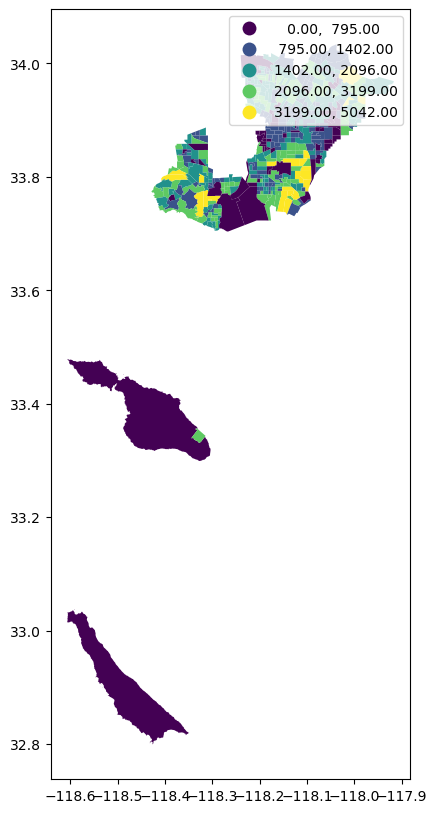

In [364]:
district4_tracts_race.plot(figsize=(12,10),
                            column='White',
                 legend=True, 
                 scheme='NaturalBreaks')


<Axes: >

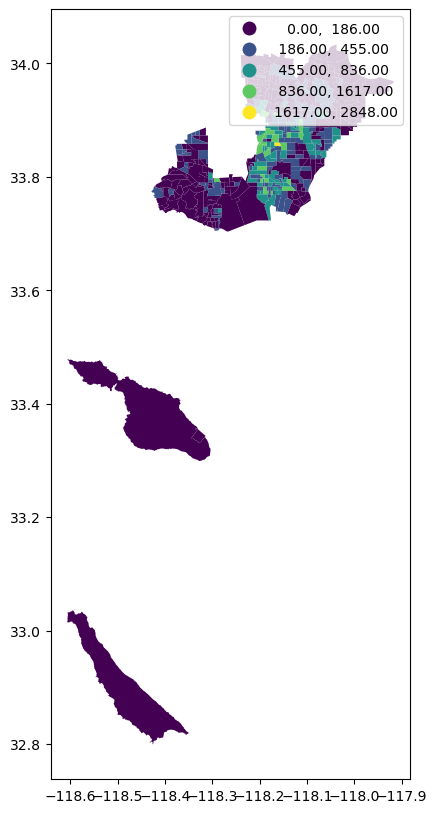

In [301]:
district4_tracts_race.plot(figsize=(12,10),
                            column='Black',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

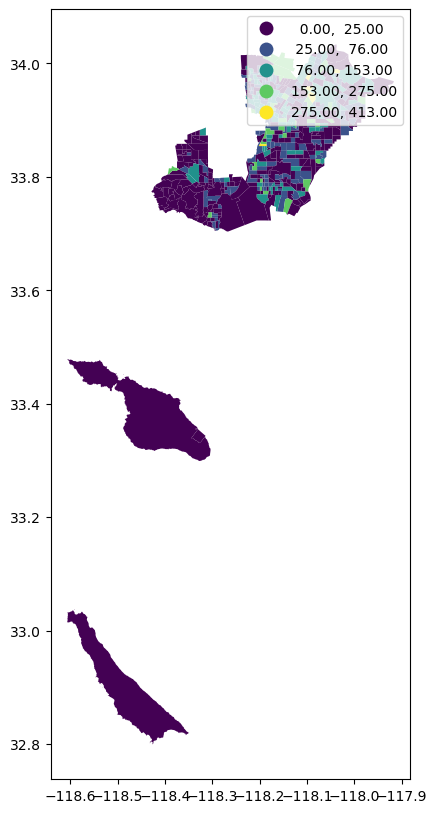

In [302]:
district4_tracts_race.plot(figsize=(12,10),
                            column='NativeAmerican',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

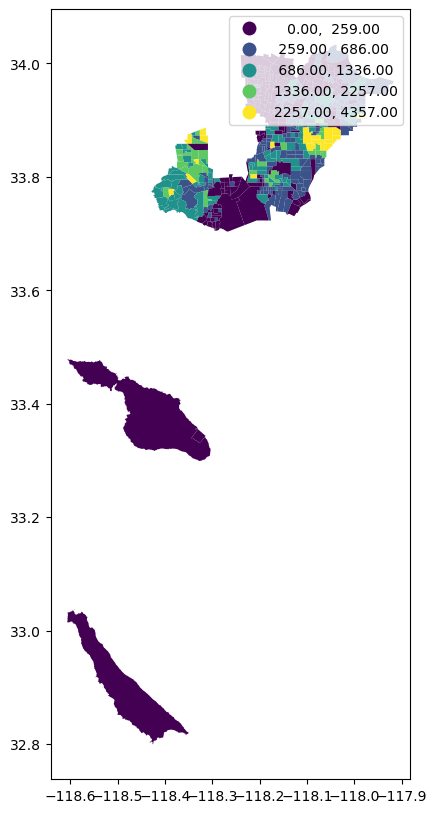

In [303]:
district4_tracts_race.plot(figsize=(12,10),
                            column='Asian',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

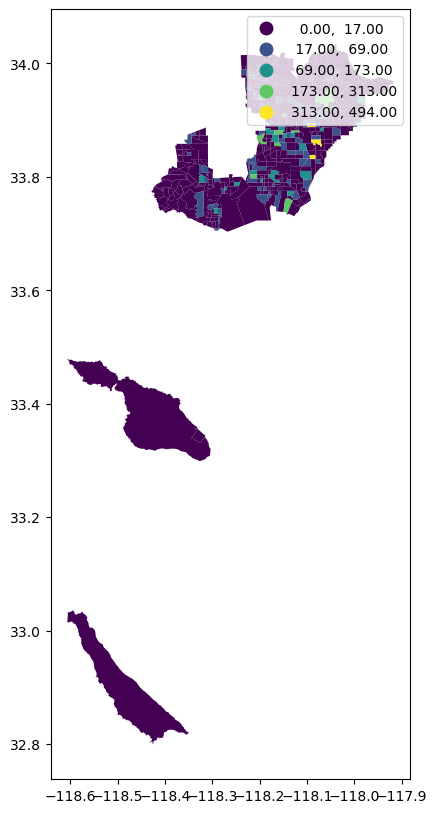

In [304]:
district4_tracts_race.plot(figsize=(12,10),
                            column='HawaiianAPI',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

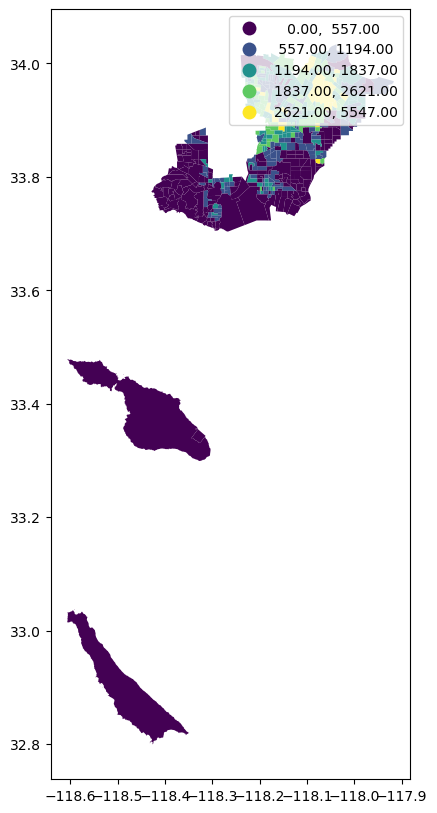

In [305]:
district4_tracts_race.plot(figsize=(12,10),
                            column='Other',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

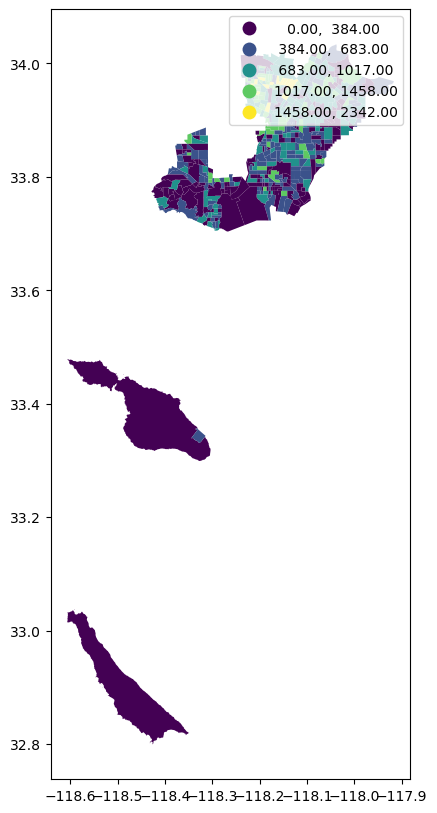

In [306]:
district4_tracts_race.plot(figsize=(12,10),
                            column='Twoplus',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

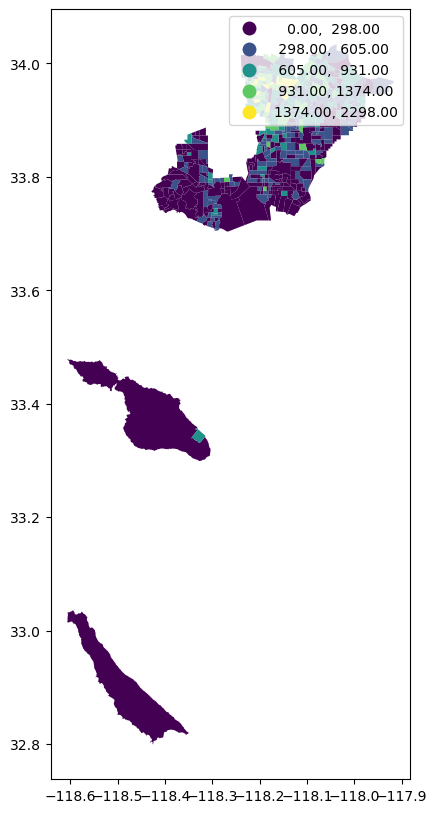

In [307]:
district4_tracts_race.plot(figsize=(12,10),
                            column='TwoplusOther',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

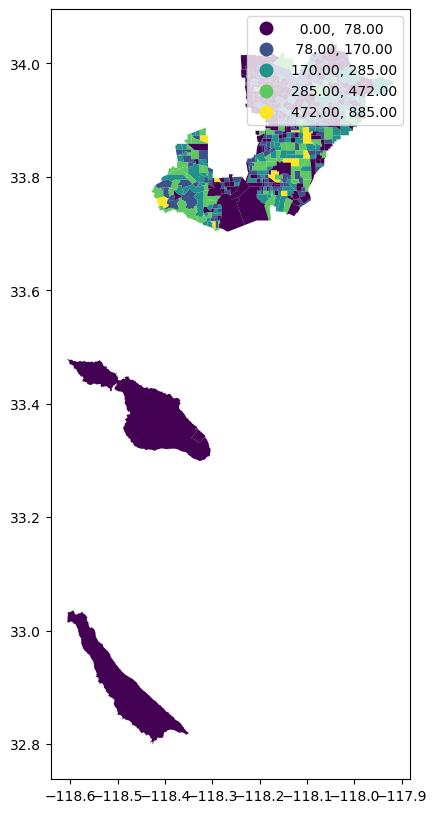

In [308]:
district4_tracts_race.plot(figsize=(12,10),
                            column='TwominusOther_Threeplus',
                 legend=True, 
                 scheme='NaturalBreaks')

### Now that I've located where people of different racial identity groups live within my district, I'm ready to see where they are located in relation to green spaces like parks and to extrapolate this to the rest of LA County.

# WEEK 4 Homework - Start

In [310]:
parks = gpd.read_file('data/Countywide_Parks_and_Open_Space_(Public_-_Hosted).geojson')
parks.head()

OBJECTID  UNIT_ID     LMS_ID                             PARK_NAME  \
0         1     30.0    23603.0                        El Barrio Park   
1         2     56.0        NaN                        El Dorado Park   
2         3     62.0  3000015.0                  Atlantic Avenue Park   
3         4     72.0    22715.0                     El Escorpion Park   
4         5     78.0    22860.0  El Marino Park/ El Marino Elementary   

                                   PARK_LBL   ACCESS_TYP  RPT_ACRES  \
0                            El Barrio Park  Open Access      2.093   
1                            El Dorado Park  Open Access      5.144   
2                      Atlantic Avenue Park  Open Access      1.960   
3                         El Escorpion Park  Open Access     66.914   
4  El Marino Park Elementary/El Marino Park  Open Access      3.200   

   GIS_ACRES              AGNCY_NAME AGNCY_LEV  ...  CENTER_LON  \
0   2.092992      Claremont, City of      City  ... -117.704423   
1   5.143217      Lancaster, City of      City  ... -118.122109   
2   1.959610  Los Angeles, County of    County  ... -118.155201   
3  66.338029    Los Angeles, City of      City  ... -118.664169   
4   1.650439    Culver City, City of      City  ... -118.399233   

                 ADDRESS         CITY    ZIP  \
0     400 Claremont Blvd    Claremont  91711   
1         44501 5th St E    Lancaster  93535   
2  570 S. Atlantic Blvd.  Los Angeles  90022   
3  6801  Sunset Ridge Ct   West Hills  91307   
4          11450 Port Rd  Culver City  90230   

                                               HOURS  \
0                                               None   
1                                               None   
2  March 1st to October 31st<br>\nOperating Hours...   
3                                               None   
4                                               None   

                                              PHONES IS_COUNTY   Shape__Area  \
0                                               None        No  9.117036e+04   
1                                               None        No  2.240376e+05   
2  General/Aquatics: (323) 260-2341; Reservations...       Yes  8.536029e+04   
3                                     (818) 883-6641        No  2.889673e+06   
4                                               None        No  7.189283e+04   

  Shape__Length                                           geometry  
0   1451.547906  POLYGON ((-117.70383 34.09747, -117.70421 34.0...  
1   2192.277128  POLYGON ((-118.12252 34.69275, -118.12252 34.6...  
2   1139.269960  POLYGON ((-118.15541 34.02582, -118.15540 34.0...  
3   7761.831975  POLYGON ((-118.66713 34.19881, -118.66714 34.1...  
4   1215.415276  POLYGON ((-118.39909 33.99221, -118.39910 33.9...  

[5 rows x 53 columns]

### Let me map this and see what I'm working with. 

<Axes: >

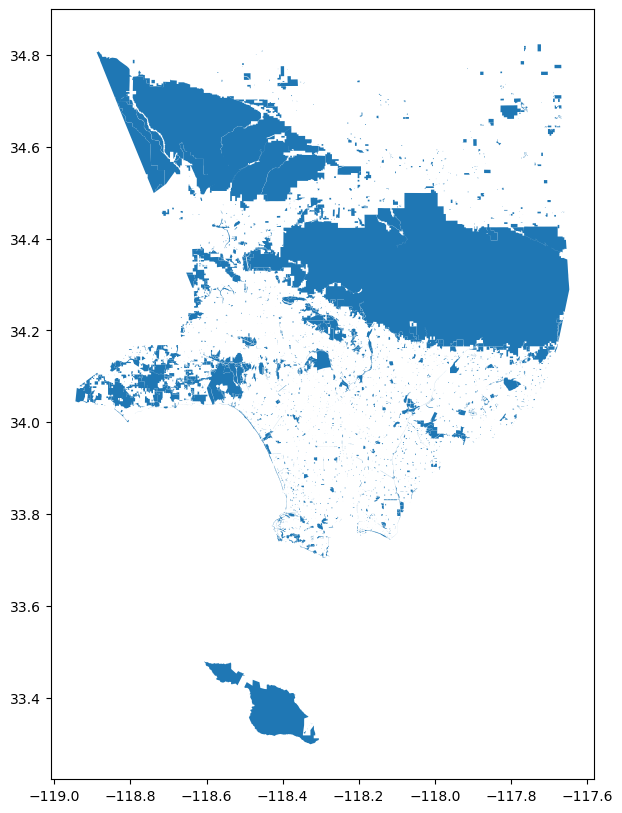

In [311]:
parks.plot(figsize=(12,10))

### I'm check and see if there's anything I can use to merge the parks data with my previous merges.

In [365]:
 parks.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       3012 non-null   int64   
 1   UNIT_ID        3011 non-null   float64 
 2   LMS_ID         1263 non-null   float64 
 3   PARK_NAME      3012 non-null   object  
 4   PARK_LBL       3012 non-null   object  
 5   ACCESS_TYP     3012 non-null   object  
 6   RPT_ACRES      3012 non-null   float64 
 7   GIS_ACRES      3012 non-null   float64 
 8   AGNCY_NAME     3012 non-null   object  
 9   AGNCY_LEV      3012 non-null   object  
 10  AGNCY_TYP      3012 non-null   object  
 11  AGNCY_WEB      3010 non-null   object  
 12  MNG_AGENCY     3012 non-null   object  
 13  COGP_TYP       3011 non-null   object  
 14  NDS_AN_TYP     3009 non-null   object  
 15  NEEDS_ANLZ     3010 non-null   object  
 16  TKIT_SUM       3010 non-null   object  
 17  AMEN_RPT       3010 non-n

### I see that geometry could be a match. Hopefully, that will work!

In [366]:
park_locations = district4_tracts_race.merge(parks,on = "geometry")
park_locations.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 0 entries
Data columns (total 84 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   OBJECTID_x               0 non-null      int64   
 1   CT20_x                   0 non-null      object  
 2   LABEL_x                  0 non-null      object  
 3   ShapeSTArea              0 non-null      float64 
 4   ShapeSTLength            0 non-null      float64 
 5   geometry                 0 non-null      geometry
 6   GEO_ID                   0 non-null      object  
 7   Total                    0 non-null      int64   
 8   White                    0 non-null      int64   
 9   Black                    0 non-null      int64   
 10  NativeAmerican           0 non-null      int64   
 11  Asian                    0 non-null      int64   
 12  HawaiianAPI              0 non-null      int64   
 13  Other                    0 non-null      int64   
 14  Twoplus       

### That didn't seem to work. I'm going to play around with some new python libraries to see if that'll help.
### I'll try the geopandas.overlay one since it seems to work with datasets that have similar geometries.

In [367]:
from shapely.geometry import Polygon
geopandas = gpd
parks_locations = geopandas.overlay(district4_tracts_race, parks, how='intersection', keep_geom_type=None, make_valid=True)

In [316]:
parks_locations.head()

OBJECTID_1  CT20_x  LABEL_x   ShapeSTArea  ShapeSTLength       GEO_ID  \
0        6042  293302  2933.02  1.204979e+07   15348.488613  06037293302   
1        6046  294110  2941.10  1.064876e+07   16670.817042  06037294110   
2        6047  294120  2941.20  1.680434e+07   17112.992502  06037294120   
3        6047  294120  2941.20  1.680434e+07   17112.992502  06037294120   
4        6049  294301  2943.01  7.676012e+06   11675.194191  06037294301   

   Total  White  Black  NativeAmerican  ...  CENTER_LON              ADDRESS  \
0   4637   1598    545               2  ... -118.300286  24901  Frampton Ave   
1   3938   1908     10               0  ... -118.262511    1450  Avalon Blvd   
2   2809   1883    136               0  ... -118.248046           1300  O St   
3   2809   1883    136               0  ... -118.255199           605 E O St   
4   2731   1173     25              47  ... -118.281647     421 Bay View Ave   

          CITY    ZIP  HOURS          PHONES  IS_COUNTY  Shape__Area_2  \
0  Harbor City  90710   None  (310) 548-7729         No  439494.465820   
1   Wilmington  90744   None  (310) 548-7420         No   21868.014648   
2   Wilmington  90744   None  (310) 548-7675         No    5750.265625   
3   Wilmington  90744   None            None         No  369147.189453   
4   Wilmington  90744   None            None         No  821664.780273   

   Shape__Length_2                                           geometry  
0      5717.872062  MULTIPOLYGON (((-118.29976 33.80000, -118.2992...  
1       607.032723  POLYGON ((-118.26281 33.79251, -118.26284 33.7...  
2       341.911358  POLYGON ((-118.24812 33.79258, -118.24815 33.7...  
3      2439.007061  POLYGON ((-118.25411 33.79232, -118.25464 33.7...  
4      4031.718506  POLYGON ((-118.28090 33.79721, -118.28078 33.7...  

[5 rows x 84 columns]

### Looks like it might have worked. This is promising (but I'm scared AHHHH). Let me check with a map.

<Axes: >

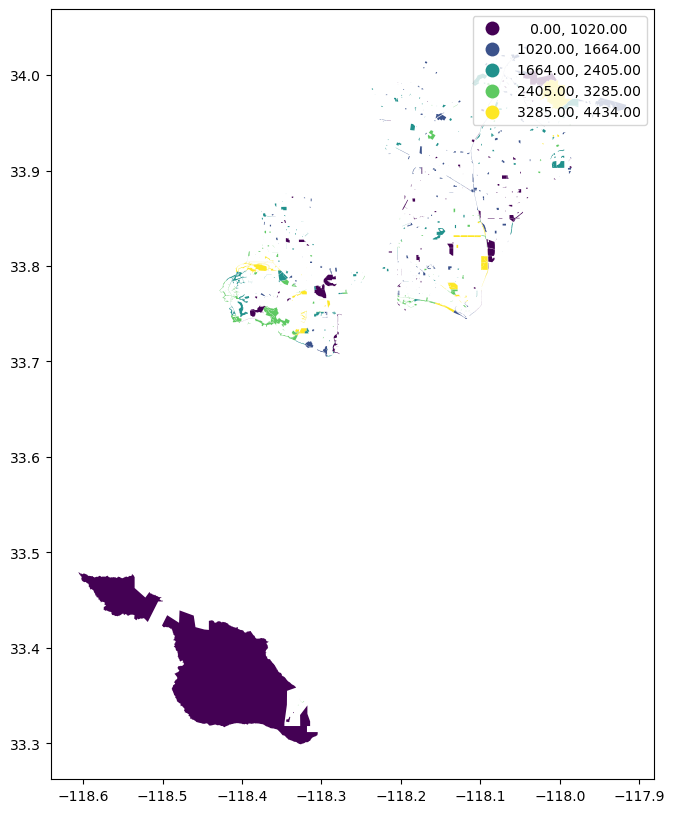

In [318]:
parks_locations.plot(figsize=(12,10),
                            column='White',
                 legend=True, 
                 scheme='NaturalBreaks')

### Wait lowkey I think it did work. If I'm reading this right, it seems as though I've plotted all the parks in District 4. Each park is in a specific census tract and the parks color corresponds to how many white people live in that census tracts. 

### Let me try this again with a different group. 

<Axes: >

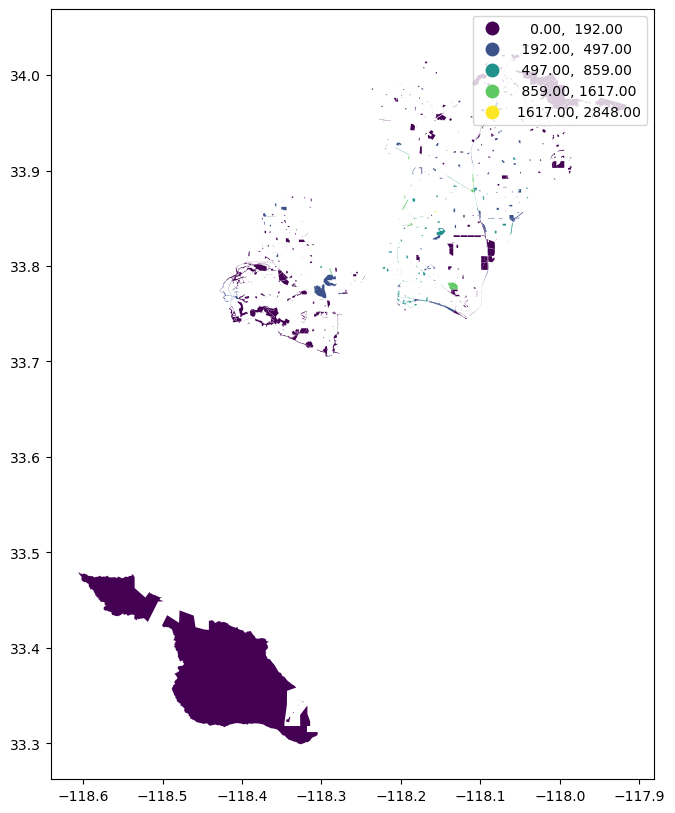

In [368]:
parks_locations.plot(figsize=(12,10),
                            column='Black',
                 legend=True, 
                 scheme='NaturalBreaks')

# Folium
### Before I finish, I want to make sure I can interact with this data on a larger map.

In [370]:
import folium

In [371]:
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=parks_locations, # geo data
                  data=parks_locations, # data          
                  key_on='feature.properties.GEO_ID', # key, or merge column
                  columns=['GEO_ID', 'White'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Population of White People in D4 Census Tracts Where Parks Are').add_to(m)    # name on the legend color bar
m

In [372]:
m.save('D4_LA_White_Population.html')

### Okay this is sick hahaha now I'm motivated to try more but we will see how that goes.

### I want to try this same map but with different colors. 

In [373]:
import branca.colormap as cm
linear = cm.LinearColormap(["green", "yellow", "red"], vmin=3, vmax=10)

linear


In [374]:
### These colors look nice! Let's see how it comes out. 
import folium
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Chloropleth(
                  geo_data=parks_locations, # geo data
                  data=parks_locations, # data          
                  key_on='feature.properties.GEO_ID', # key, or merge column
                  columns=['GEO_ID', 'White'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Population of White People in D4 Census Tracts Where Parks Are').add_to(m)    # name on the legend color bar
m

AttributeError: module 'folium' has no attribute 'Chloropleth'

### This didn't work but I'm looking forward to troubleshooting some more. Nonetheless, I think what I did was a good start for the midterm! I'm excited to get this data for another district and compare them (and do the same with different health and transit data). Next week will be helpful too so we can plot these over more legible maps.  
